In [ ]:
!unzip '/content/archive (12).zip'

Archive:  /content/archive (12).zip
replace Test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Test.csv                
replace Train.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Train.csv               


In [ ]:
print("importing required libraries")
import pandas as pd
import numpy as np
import ast
import time
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import  LabelEncoder
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

importing required libraries


In [ ]:
df_data=pd.read_csv('/content/Train.csv')

In [ ]:
df_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [ ]:
df_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [ ]:
del df_data['Var_1']
del df_data['Segmentation']

In [ ]:
df_data['Family_Size']=df_data['Family_Size'].fillna(df_data['Family_Size'].mean())

In [ ]:
df_data['Work_Experience']=df_data['Work_Experience'].fillna(0)

([0, 1], <a list of 2 Text major ticklabel objects>)

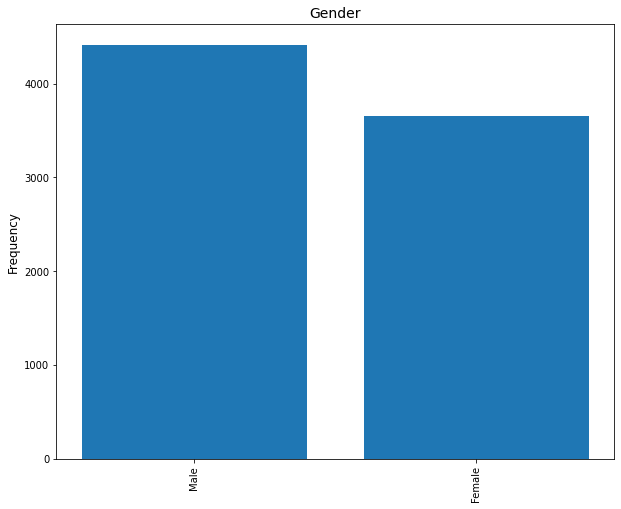

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["Gender"].value_counts().index,
        df_data["Gender"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Gender", size = 14)
plt.xticks(rotation=90)

([0, 1], <a list of 2 Text major ticklabel objects>)

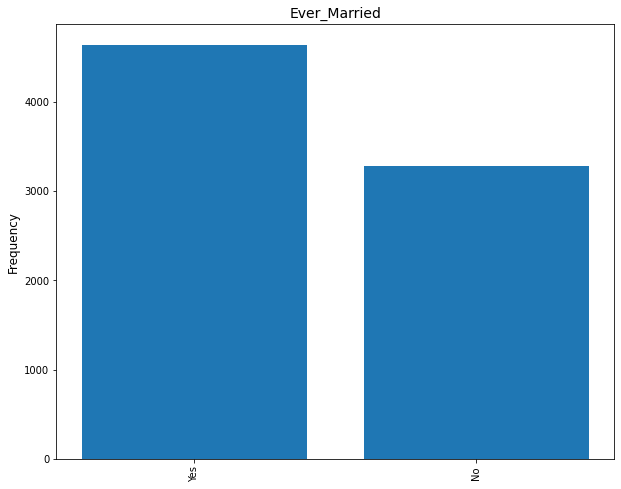

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["Ever_Married"].value_counts().index,
        df_data["Ever_Married"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Ever_Married", size = 14)
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8], <a list of 9 Text major ticklabel objects>)

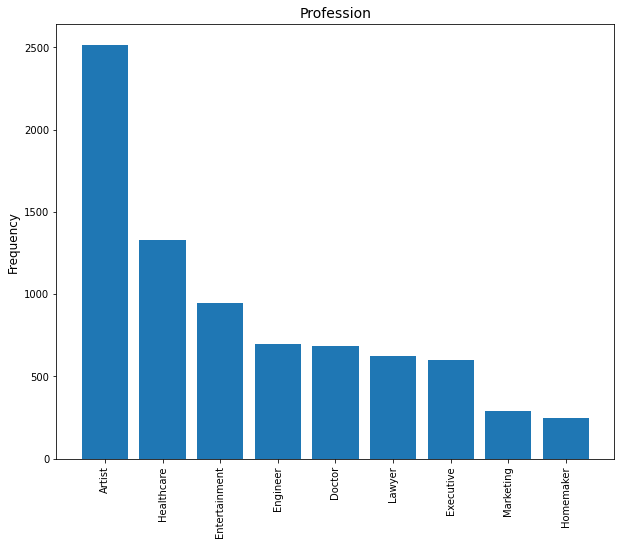

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["Profession"].value_counts().index,
        df_data["Profession"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Profession", size = 14)
plt.xticks(rotation=90)

([0, 1, 2], <a list of 3 Text major ticklabel objects>)

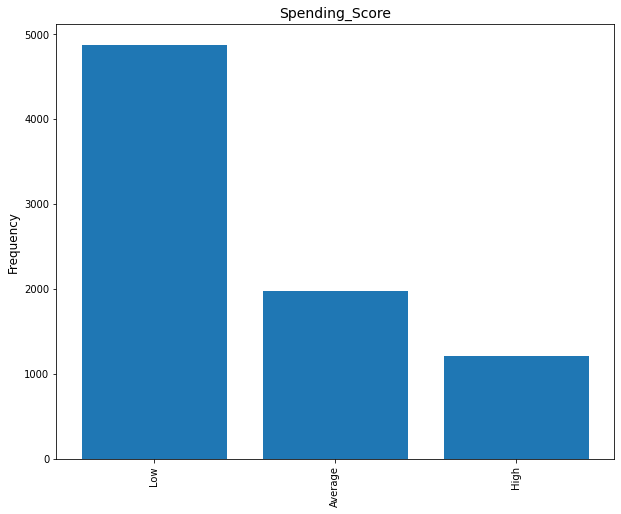

In [ ]:
fig, ax = plt.subplots(figsize = (10,8))
ax.bar(df_data["Spending_Score"].value_counts().index,
        df_data["Spending_Score"].value_counts().values)
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Spending_Score", size = 14)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


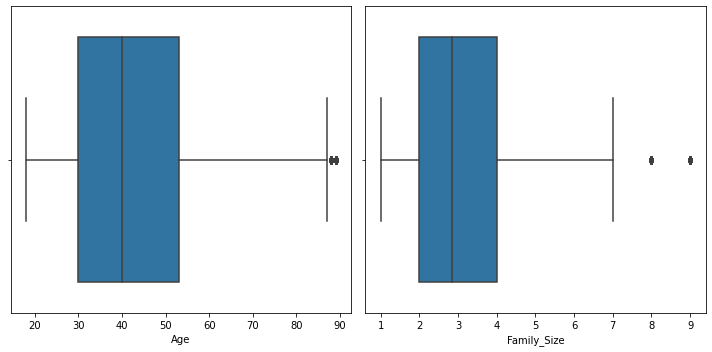

In [ ]:
from matplotlib import pyplot as plot
def detectOutliers():
    fig, axs = plot.subplots(1,2, figsize = (10,5))
    plt1 = sns.boxplot(df_data['Age'], ax = axs[0])
    plt2 = sns.boxplot(df_data['Family_Size'], ax = axs[1])
    
    plot.tight_layout()
detectOutliers()

In [ ]:
len(df_data)

8068

In [ ]:
df_data=df_data[df_data['Age']<75]

In [ ]:
len(df_data)

7595

In [ ]:
df_data=df_data[df_data['Family_Size']<7]

In [ ]:
len(df_data)

7407

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


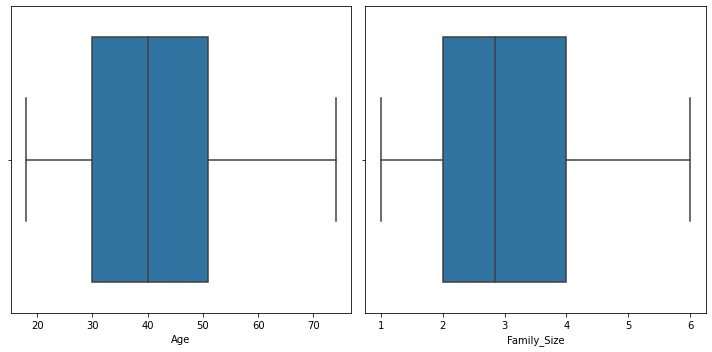

In [ ]:
from matplotlib import pyplot as plot
def detectOutliers():
    fig, axs = plot.subplots(1,2, figsize = (10,5))
    plt1 = sns.boxplot(df_data['Age'], ax = axs[0])
    plt2 = sns.boxplot(df_data['Family_Size'], ax = axs[1])
    
    plot.tight_layout()
detectOutliers()

In [ ]:
df_data.corr()

,ID,Age,Work_Experience,Family_Size
ID,1.000000,0.002618,-0.015723,0.014469
Age,0.002618,1.000000,-0.140833,-0.216166
Work_Experience,-0.015723,-0.140833,1.000000,-0.095941
Family_Size,0.014469,-0.216166,-0.095941,1.000000


In [ ]:
df_data.isnull().sum()

ID                   0
Gender               0
Ever_Married       132
Age                  0
Graduated           68
Profession         114
Work_Experience      0
Spending_Score       0
Family_Size          0
dtype: int64

In [ ]:
df_data['Ever_Married']=df_data['Ever_Married'].fillna('Unknown')

In [ ]:
df_data['Profession']=df_data['Profession'].fillna('Unknown')

In [ ]:
df_data = df_data.dropna(subset=['Graduated'])


In [ ]:
len(df_data)

7339

In [ ]:
df_data_clus=df_data

In [ ]:
df_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,0.0,High,6.0


In [ ]:
df_data.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

In [ ]:
df_data.to_csv('Demographic_data.csv')

In [ ]:
df_data.Spending_Score=df_data.Spending_Score.astype('category').cat.codes

In [ ]:
df_data.Graduated=df_data.Graduated.astype('category').cat.codes

In [ ]:
df_data.Gender=df_data.Gender.astype('category').cat.codes

In [ ]:
df_data.Ever_Married=df_data.Ever_Married.astype('category').cat.codes

In [ ]:
df_data.Profession=df_data.Profession.astype('category').cat.codes

In [ ]:
df_data.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,1,0,22,0,5,1.0,2,4.0
1,462643,0,2,38,1,2,0.0,0,3.0
2,466315,0,2,67,1,2,1.0,2,1.0
3,461735,1,2,67,1,7,0.0,1,2.0
4,462669,0,2,40,1,3,0.0,1,6.0


In [ ]:
df_data_final_pred=df_data

In [ ]:
from numpy import unique
from numpy import where
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()                                         
df_scaled = scaler.fit_transform(df_data)

In [ ]:
df_scaled

array([[-0.26104723,  0.90788793, -1.15262588, ..., -0.43100125,
         0.74929206,  0.92428811],
       [-0.3251718 , -1.10145753,  0.88326373, ..., -0.72731208,
        -1.5597797 ,  0.16114604],
       [ 1.09329446, -1.10145753,  0.88326373, ..., -0.43100125,
         0.74929206, -1.36513808],
       ...,
       [ 0.74215453, -1.10145753, -1.15262588, ..., -0.43100125,
         0.74929206, -1.36513808],
       [ 1.47340633, -1.10145753, -1.15262588, ..., -0.43100125,
         0.74929206,  0.92428811],
       [-0.62029931,  0.90788793,  0.88326373, ..., -0.72731208,
        -1.5597797 ,  0.16114604]])

In [ ]:
wcss_1 = []                                     
range_values = range(1, 10)                    
for i in range_values:                        
  kmeans = KMeans(n_clusters=i)                 
  kmeans.fit(df_scaled)            
  wcss_1.append(kmeans.inertia_)

In [ ]:
kmeans = KMeans(n_clusters=2)           
kmeans.fit(df_scaled)         
labels = kmeans.labels_

In [ ]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df_data.columns])
cluster_centers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,-0.028563,-0.141725,-1.034054,-0.671418,-0.276814,0.268150,0.108692,0.739587,0.024778
1,0.023739,0.117786,0.859390,0.558007,0.230057,-0.222856,-0.090333,-0.614662,-0.020593


In [ ]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df_data.columns])
cluster_centers

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,463410.833684,0.477634,0.116482,31.839688,0.497148,3.338637,2.821375,1.991594,2.821307
1,463546.228543,0.606786,1.976547,49.045908,0.741766,2.096307,2.149701,0.818613,2.761855


In [ ]:
df_mk_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_mk_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0


In [ ]:
# pd_k_1

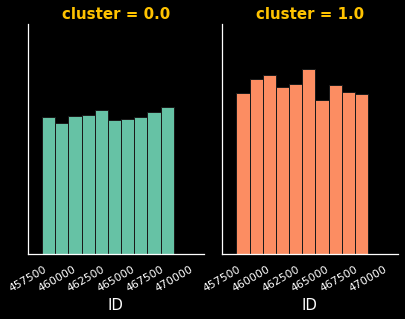

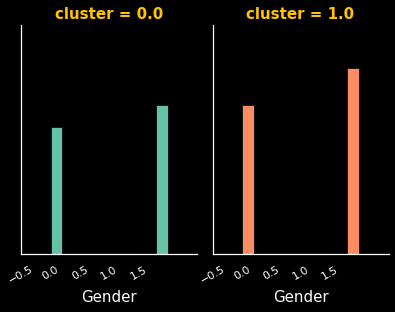

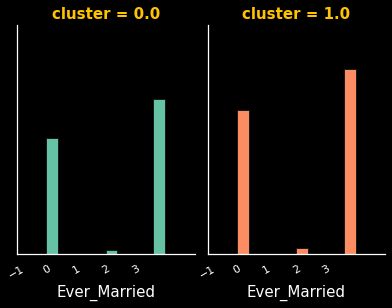

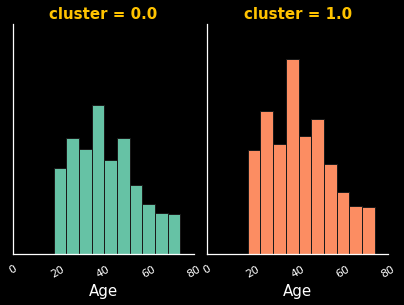

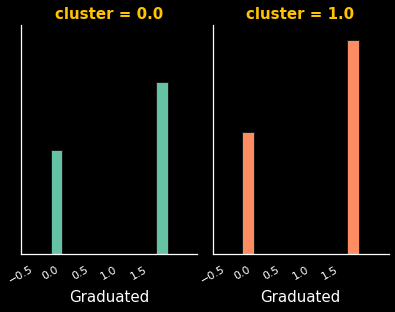

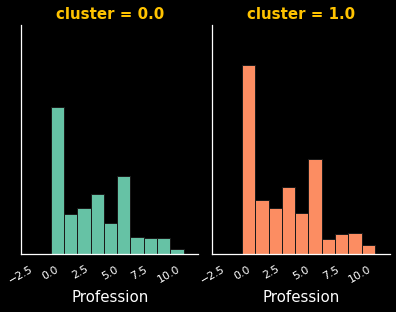

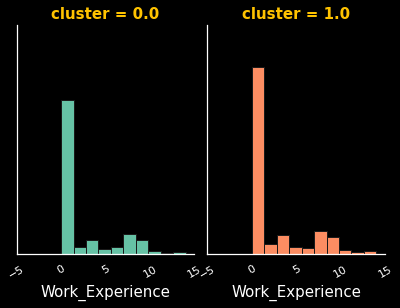

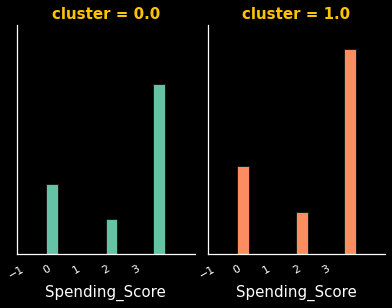

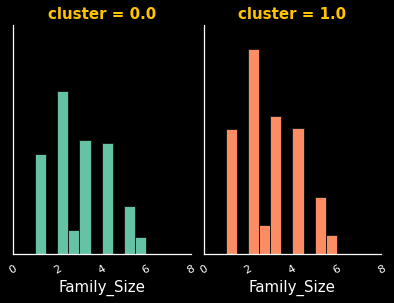

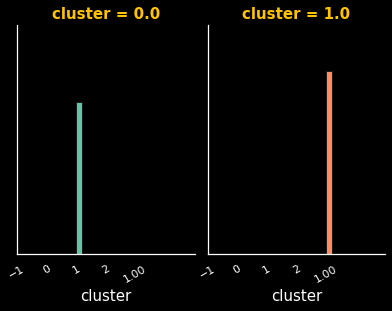

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_mk_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_mk_cluster['freq_count_mk'] = df_mk_cluster.groupby('cluster')['cluster'].transform('count')
df_mk_cluster['score_ranked_mk']=df_mk_cluster['freq_count_mk'].rank(ascending=0,method='dense')
df_mk_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_mk,score_ranked_mk
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0,3330.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0,4009.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0,4009.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0,4009.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0,4009.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


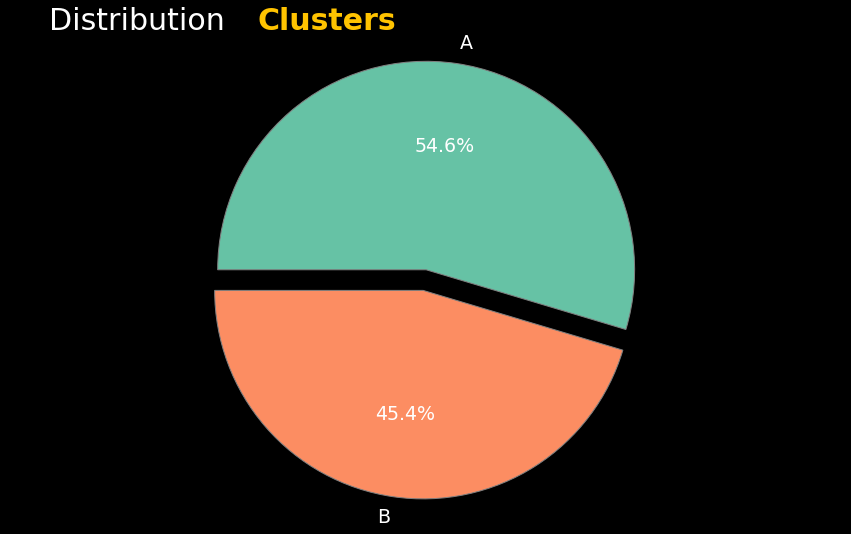

In [ ]:
clusters_count = df_mk_cluster['score_ranked_mk'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage


Text(0, 0.5, 'Y')

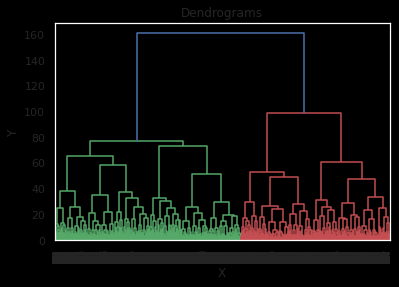

In [ ]:
dendrograma = dendrogram(linkage(df_scaled, method='ward'))
plt.title('Dendrograms')
plt.xlabel('X')
plt.ylabel('Y')

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
hc_g = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage = 'ward')
rotulos = hc_g.fit_predict(df_scaled)

In [ ]:
# pd_a_1

In [ ]:

df_ag_cluster = pd.concat([df_data, pd.DataFrame({'cluster': rotulos})], axis = 1) 
df_ag_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0


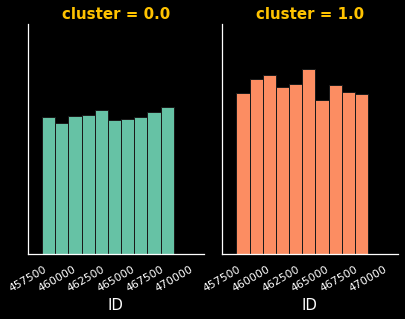

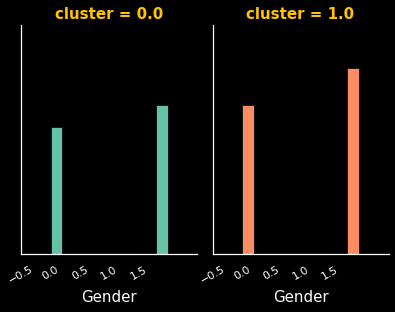

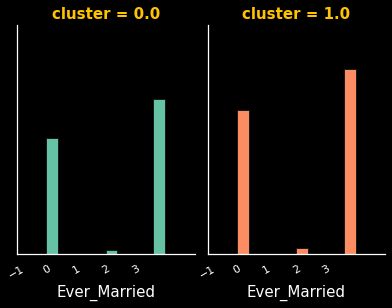

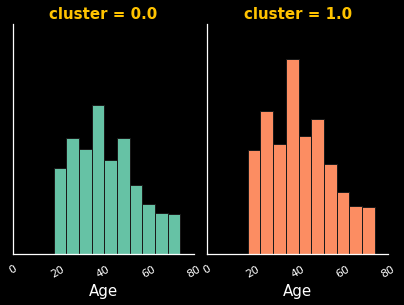

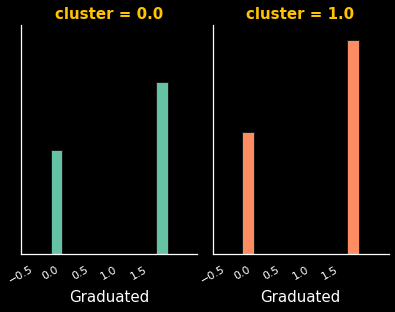

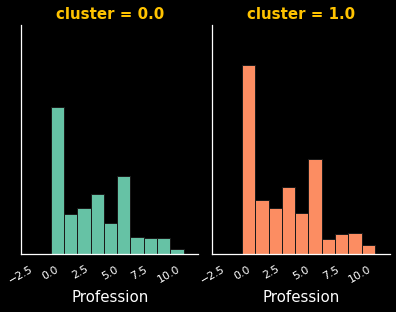

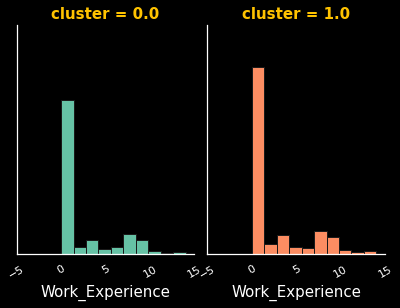

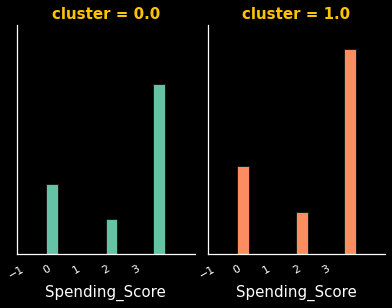

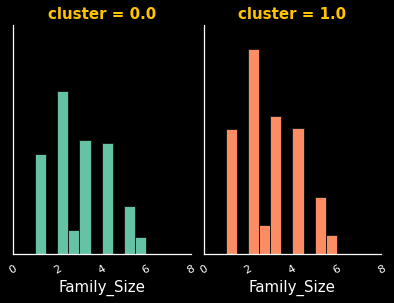

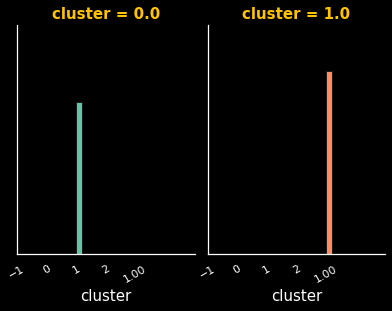

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_ag_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_ag_cluster['freq_count_ag'] = df_ag_cluster.groupby('cluster')['cluster'].transform('count')
df_ag_cluster['score_ranked_ag']=df_ag_cluster['freq_count_ag'].rank(ascending=0,method='dense')
df_ag_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_ag,score_ranked_ag
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0,3247.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0,4092.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0,4092.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0,4092.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0,4092.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


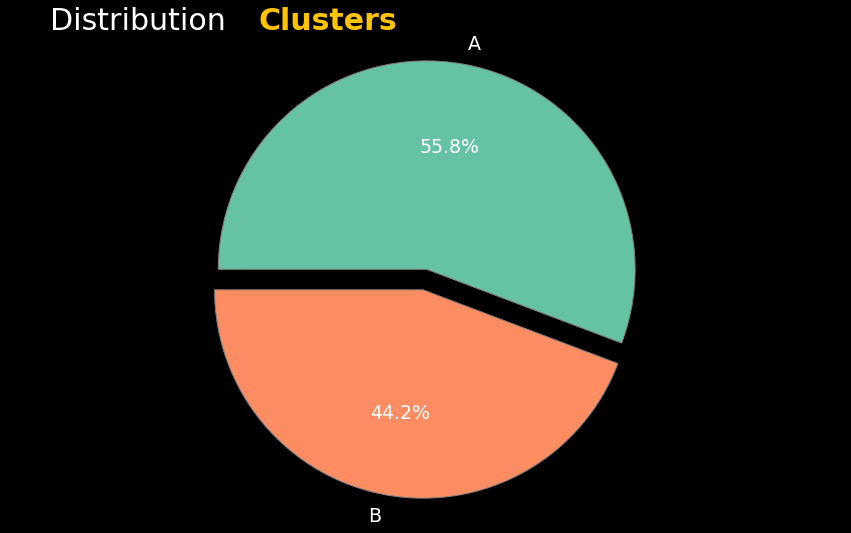

In [ ]:
clusters_count = df_ag_cluster['score_ranked_ag'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn.cluster import Birch

In [ ]:
brc = Birch(branching_factor=50, n_clusters=2, threshold=1.5)
brc.fit(df_scaled)

Birch(n_clusters=2, threshold=1.5)

In [ ]:
labels = brc.predict(df_scaled)
labels

array([1, 0, 0, ..., 0, 1, 0])

In [ ]:

df_bc_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_bc_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,1.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,0.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,0.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,0.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,0.0


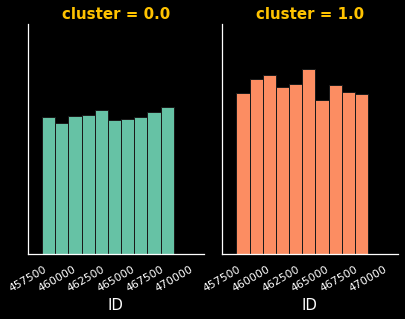

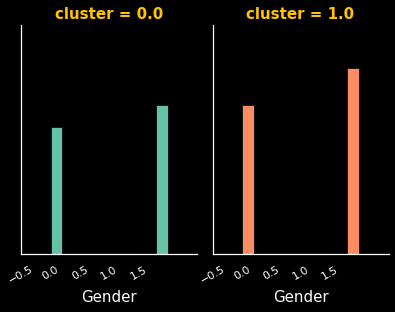

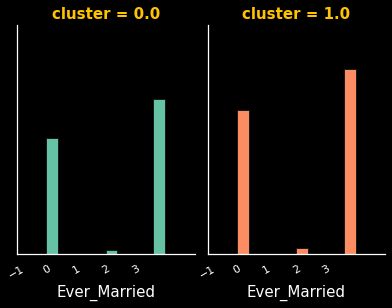

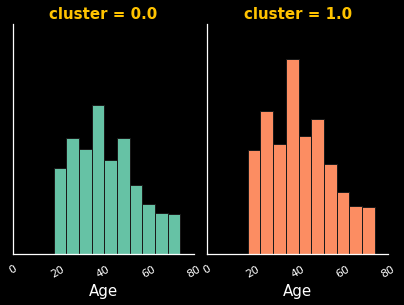

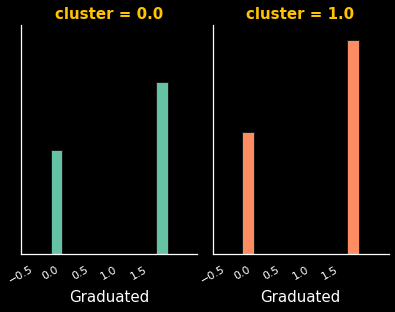

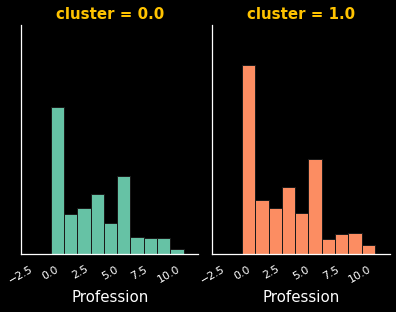

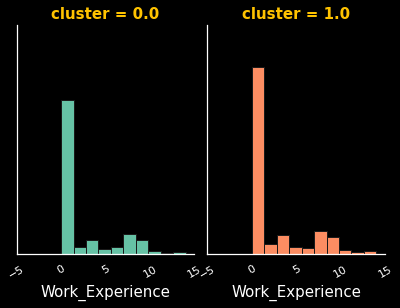

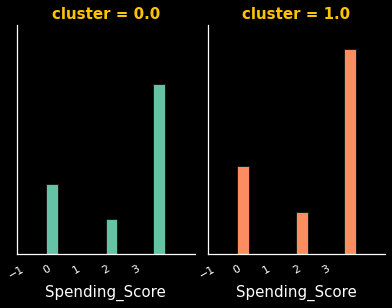

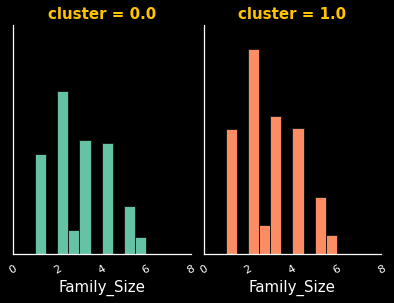

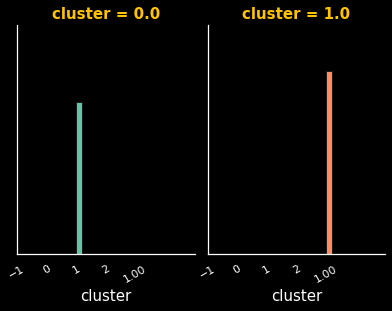

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_bc_cluster:
    g = sns.FacetGrid(df_mk_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_bc_cluster['freq_count_bc'] = df_bc_cluster.groupby('cluster')['cluster'].transform('count')
df_bc_cluster['score_ranked_bc']=df_bc_cluster['freq_count_bc'].rank(ascending=0,method='dense')
df_bc_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_bc,score_ranked_bc
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,1.0,3012.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,0.0,4327.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,0.0,4327.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,0.0,4327.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,0.0,4327.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


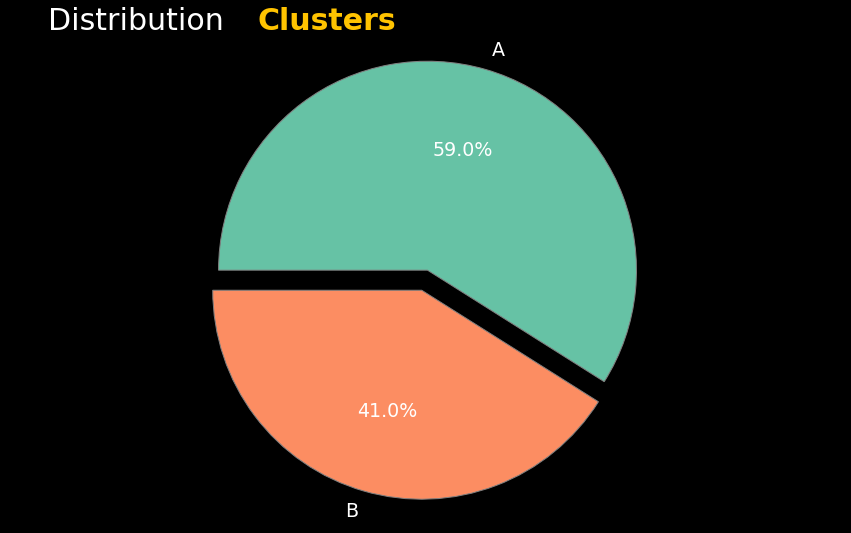

In [ ]:
clusters_count = df_bc_cluster['score_ranked_bc'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters=2)
sc.fit(df_scaled)

labels = sc.fit_predict(df_scaled)
labels

array([1, 0, 0, ..., 1, 1, 0], dtype=int32)

In [ ]:
set(labels)

{0, 1}

In [ ]:
df_sc_cluster = pd.concat([df_data, pd.DataFrame({'cluster': labels})], axis = 1) 
df_sc_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,1.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,0.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,0.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,0.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,0.0


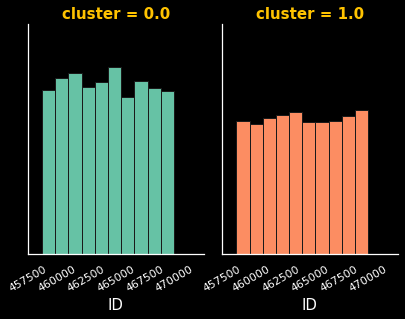

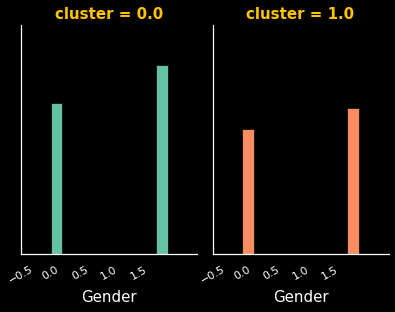

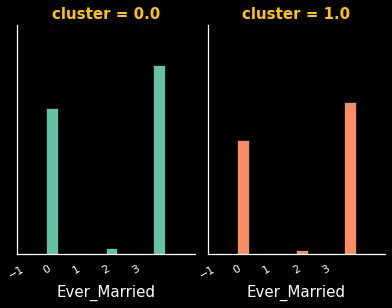

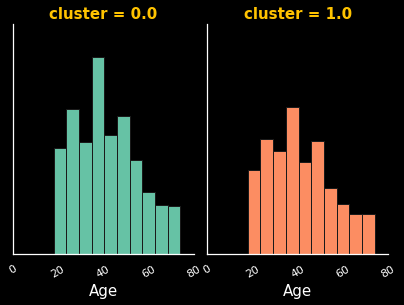

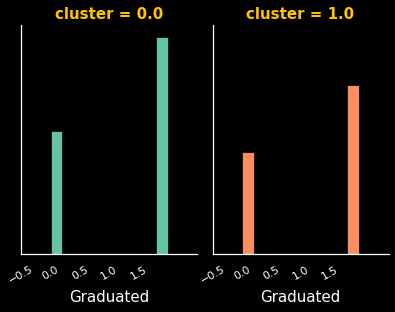

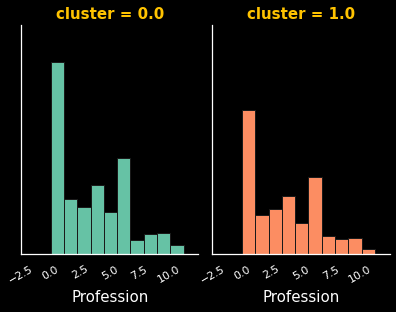

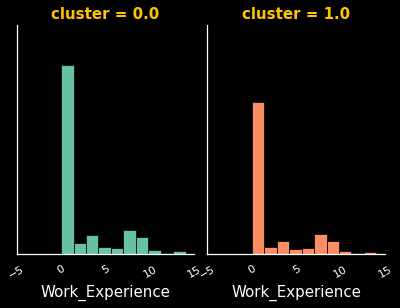

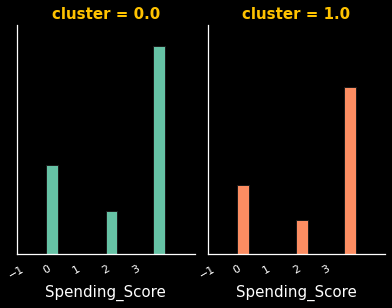

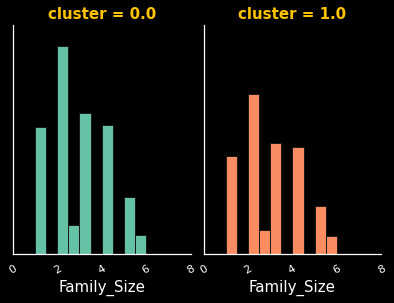

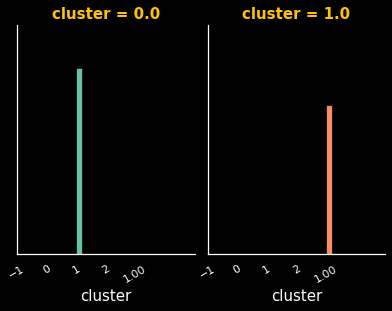

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_sc_cluster:
    g = sns.FacetGrid(df_sc_cluster, col = "cluster", hue = "cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

In [ ]:
df_sc_cluster['freq_count_sc'] = df_sc_cluster.groupby('cluster')['cluster'].transform('count')
df_sc_cluster['score_ranked_sc']=df_sc_cluster['freq_count_sc'].rank(ascending=0,method='dense')
df_sc_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_sc,score_ranked_sc
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,1.0,3263.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,0.0,4076.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,0.0,4076.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,0.0,4076.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,0.0,4076.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


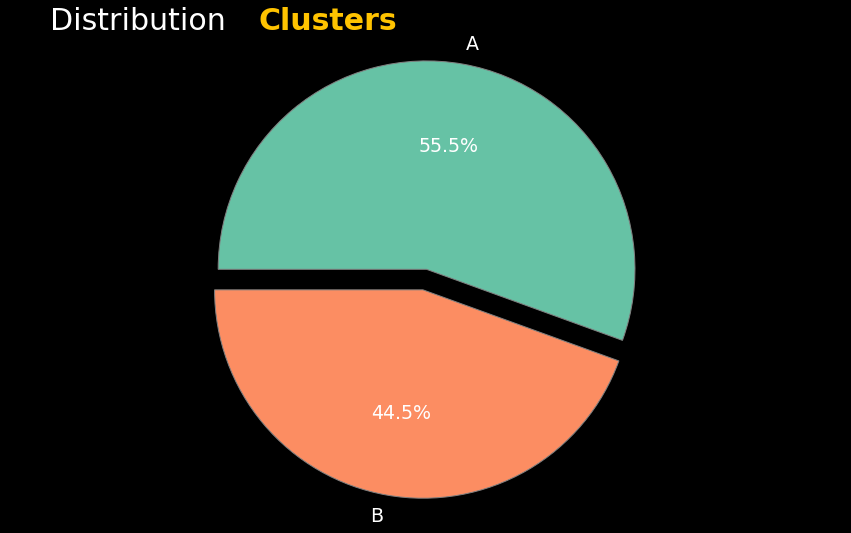

In [ ]:
clusters_count = df_sc_cluster['score_ranked_sc'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B"
        
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();

In [ ]:
from sklearn import metrics
from scipy.spatial.distance import cdist

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K:
	# Building and fitting the model
	kmeanModel = KMeans(n_clusters=k).fit(df_scaled)
	kmeanModel.fit(df_scaled)

	distortions.append(sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
										'euclidean'), axis=1)) / df_scaled.shape[0])
	inertias.append(kmeanModel.inertia_)

	mapping1[k] = sum(np.min(cdist(df_scaled, kmeanModel.cluster_centers_,
								'euclidean'), axis=1)) / df_scaled.shape[0]
	mapping2[k] = kmeanModel.inertia_


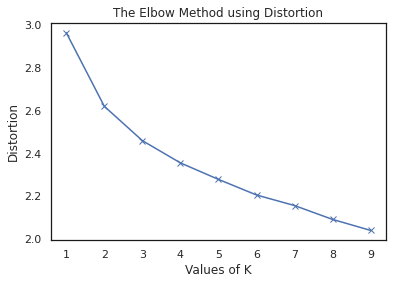

In [ ]:
sns.set(rc={'axes.facecolor':'white', 'figure.facecolor':'white', 'axes.grid' : True})
plt.rc('axes',edgecolor='k')
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()


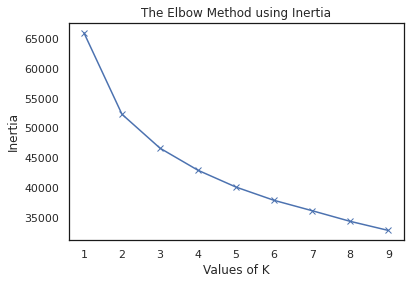

In [ ]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()


In [ ]:
unique_colors = set(dendrograma['color_list'])
print(len(unique_colors) -1)

2


In [ ]:
df_mk_cluster.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_mk,score_ranked_mk
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0,3330.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0,4009.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0,4009.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0,4009.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0,4009.0,1.0


In [ ]:
df_mk_cluster['freq_count_mk'] = df_mk_cluster.groupby('cluster')['cluster'].transform('count')


In [ ]:
df_mk_cluster['score_ranked_mk']=df_mk_cluster['freq_count_mk'].rank(ascending=0,method='dense')

In [ ]:
df_mk_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_mk,score_ranked_mk
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0,3330.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0,4009.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0,4009.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0,4009.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0,4009.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


In [ ]:
df_bc_cluster['freq_count_bc'] = df_bc_cluster.groupby('cluster')['cluster'].transform('count')
df_bc_cluster['score_ranked_bc']=df_bc_cluster['freq_count_bc'].rank(ascending=0,method='dense')
df_bc_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_bc,score_ranked_bc
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,1.0,3012.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,0.0,4327.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,0.0,4327.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,0.0,4327.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,0.0,4327.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


In [ ]:
df_ag_cluster['freq_count_ag'] = df_ag_cluster.groupby('cluster')['cluster'].transform('count')
df_ag_cluster['score_ranked_ag']=df_ag_cluster['freq_count_ag'].rank(ascending=0,method='dense')
df_ag_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_ag,score_ranked_ag
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,0.0,3247.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,1.0,4092.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,1.0,4092.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,1.0,4092.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,1.0,4092.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


In [ ]:
df_sc_cluster['freq_count_sc'] = df_sc_cluster.groupby('cluster')['cluster'].transform('count')
df_sc_cluster['score_ranked_sc']=df_sc_cluster['freq_count_sc'].rank(ascending=0,method='dense')
df_sc_cluster

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,cluster,freq_count_sc,score_ranked_sc
0,462809.0,1.0,0.0,22.0,0.0,5.0,1.0,2.0,4.0,1.0,3263.0,2.0
1,462643.0,0.0,2.0,38.0,1.0,2.0,0.0,0.0,3.0,0.0,4076.0,1.0
2,466315.0,0.0,2.0,67.0,1.0,2.0,1.0,2.0,1.0,0.0,4076.0,1.0
3,461735.0,1.0,2.0,67.0,1.0,7.0,0.0,1.0,2.0,0.0,4076.0,1.0
4,462669.0,0.0,2.0,40.0,1.0,3.0,0.0,1.0,6.0,0.0,4076.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8062,463002.0,1.0,2.0,41.0,1.0,0.0,0.0,1.0,5.0,NaN,NaN,NaN
8064,464685.0,1.0,0.0,35.0,0.0,4.0,3.0,2.0,4.0,NaN,NaN,NaN
8065,465406.0,0.0,0.0,33.0,1.0,5.0,1.0,2.0,1.0,NaN,NaN,NaN
8066,467299.0,0.0,0.0,27.0,1.0,5.0,1.0,2.0,4.0,NaN,NaN,NaN


In [ ]:
df_ag_cluster=df_ag_cluster[['ID','score_ranked_ag']]
df_bc_cluster=df_bc_cluster[['ID','score_ranked_bc']]
df_sc_cluster=df_sc_cluster[['ID','score_ranked_sc']]
df_mk_cluster=df_mk_cluster[['ID','score_ranked_mk']]

In [ ]:
df_final=df_bc_cluster.merge(df_ag_cluster,on=['ID'],how='inner')

In [ ]:
df_ag_cluster

,ID,score_ranked_ag
0,462809.0,2.0
1,462643.0,1.0
2,466315.0,1.0
3,461735.0,1.0
4,462669.0,1.0
...,...,...
8062,463002.0,NaN
8064,464685.0,NaN
8065,465406.0,NaN
8066,467299.0,NaN


In [ ]:
df_final=df_final.dropna()

In [ ]:
df_final=df_final.merge(df_sc_cluster,on=['ID'],how='inner')

In [ ]:
df_final=df_final.dropna()
df_final=df_final.merge(df_mk_cluster,on=['ID'],how='inner')
df_final=df_final.dropna()

In [ ]:
df_final

,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk
0,462809.0,2.0,2.0,2.0,2.0
1,462643.0,1.0,1.0,1.0,1.0
2,466315.0,1.0,1.0,1.0,1.0
3,461735.0,1.0,1.0,1.0,1.0
4,462669.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...
6669,465777.0,1.0,1.0,1.0,1.0
6670,466688.0,1.0,1.0,1.0,1.0
6671,461029.0,2.0,2.0,2.0,2.0
6672,464812.0,2.0,2.0,2.0,2.0


In [ ]:
# from functools import reduce
# dfs = [df_sc_cluster[:4000],df_bc_cluster[:4000],df_ag_cluster[:4000],df_mk_cluster[:4000]]
# dfs1 = [df_sc_cluster[4000:],df_bc_cluster[4000:],df_ag_cluster[4000:],df_mk_cluster[4000:]]

# df_final = reduce(lambda left,right: pd.merge(left,right,on='ID'), dfs)

In [ ]:
# df_final=df_final[['ID','score_ranked_mk','score_ranked_sc','score_ranked_ag','score_ranked_bc']]
# df_final

In [ ]:
opts = ['score_ranked_mk','score_ranked_sc','score_ranked_bc','score_ranked_ag']
df_final['final_cluster']=df_final[opts].mode(axis=1)[0]


In [ ]:
df_final

,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster
0,462809.0,2.0,2.0,2.0,2.0,2.0
1,462643.0,1.0,1.0,1.0,1.0,1.0
2,466315.0,1.0,1.0,1.0,1.0,1.0
3,461735.0,1.0,1.0,1.0,1.0,1.0
4,462669.0,1.0,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...
6669,465777.0,1.0,1.0,1.0,1.0,1.0
6670,466688.0,1.0,1.0,1.0,1.0,1.0
6671,461029.0,2.0,2.0,2.0,2.0,2.0
6672,464812.0,2.0,2.0,2.0,2.0,2.0


In [ ]:
df_data_clusters=df_final.merge(df_data_clus,on=['ID'],how='left')

In [ ]:
df_data_clusters

,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809.0,2.0,2.0,2.0,2.0,2.0,1,0,22,0,5,1.0,2,4.000000
1,462643.0,1.0,1.0,1.0,1.0,1.0,0,2,38,1,2,0.0,0,3.000000
2,466315.0,1.0,1.0,1.0,1.0,1.0,0,2,67,1,2,1.0,2,1.000000
3,461735.0,1.0,1.0,1.0,1.0,1.0,1,2,67,1,7,0.0,1,2.000000
4,462669.0,1.0,1.0,1.0,1.0,1.0,0,2,40,1,3,0.0,1,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6669,465777.0,1.0,1.0,1.0,1.0,1.0,0,0,30,1,0,9.0,2,5.000000
6670,466688.0,1.0,1.0,1.0,1.0,1.0,1,0,23,0,5,1.0,2,3.000000
6671,461029.0,2.0,2.0,2.0,2.0,2.0,1,2,42,0,3,8.0,2,2.000000
6672,464812.0,2.0,2.0,2.0,2.0,2.0,0,2,48,1,2,0.0,1,5.000000


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==1.0][df_data_clusters['Gender']==0].mode().head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458983.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,42.0,1.0,0.0,0.0,2.0,2.0


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==2.0][df_data_clusters['Gender']==0].mode().head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,33.0,1.0,0.0,0.0,2.0,2.0


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==1.0][df_data_clusters['Spending_Score']==0].mode().head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458997.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,35.0,1.0,0.0,0.0,0.0,2.0


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==2.0][df_data_clusters['Spending_Score']==0].mode().head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458984.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,50.0,1.0,0.0,0.0,0.0,2.0


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==1.0][df_data_clusters['Family_Size']==4].mode().head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458986.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,23.0,1.0,5.0,0.0,2.0,4.0


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==2.0][df_data_clusters['Family_Size']==4].mode().head(1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,ID,score_ranked_bc,score_ranked_ag,score_ranked_sc,score_ranked_mk,final_cluster,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458985.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0,31.0,1.0,0.0,0.0,2.0,4.0


In [ ]:
df_data_clusters[df_data_clusters['final_cluster']==1.0]['Profession'].value_counts()

0    1282
5     641
3     462
1     369
2     319
4     286
8     146
7     139
6     101
9      59
Name: Profession, dtype: int64

In [ ]:
d1=df_final[df_final['score_ranked_mk']==df_final['score_ranked_ag']]

In [ ]:
d2=df_final[df_final['score_ranked_sc']==df_final['score_ranked_bc']]

In [ ]:
d1=d1.merge(d2, on=['ID',	'score_ranked_mk',	'score_ranked_sc',	'score_ranked_ag',	'score_ranked_bc',	'final_cluster'])

In [ ]:
d1=d1[d1['score_ranked_mk']==d1['score_ranked_sc']]

In [ ]:
len(d1)/len(df_final)*100.0

91.95385076415943

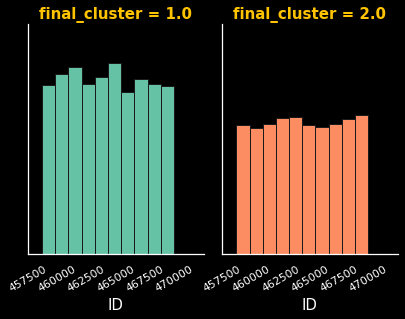

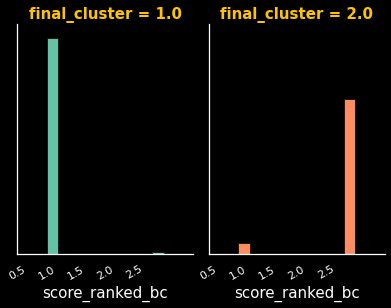

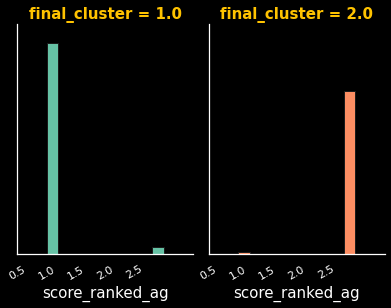

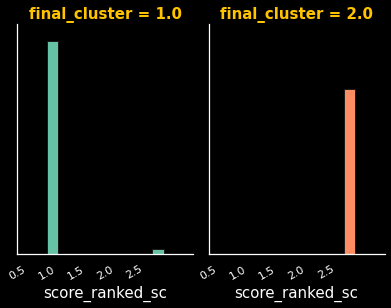

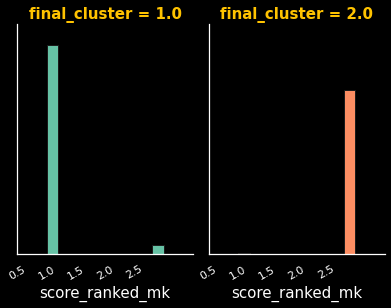

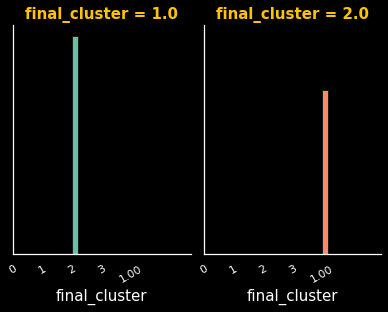

In [ ]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df_final:
    g = sns.FacetGrid(df_final, col = "final_cluster", hue = "final_cluster", palette = "Set2")
    g.map(plt.hist, i, bins=10, ec="k") 
    g.set_xticklabels(rotation=30, color = 'white')
    g.set_yticklabels(color = 'white')
    g.set_xlabels(size=15, color = 'white')
    g.set_titles(size=15, color = '#FFC300', fontweight="bold")
    g.fig.set_figheight(5);

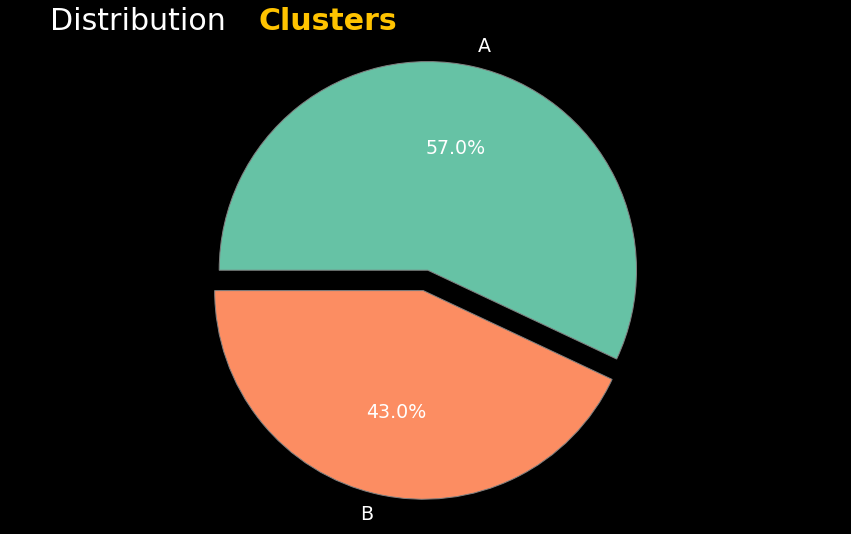

In [ ]:
clusters_count = df_final['final_cluster'].value_counts()                       
clusters_count = clusters_count.to_frame().reset_index()                      
clusters_count.columns = ['clusters', 'count']                               
clusters_count = clusters_count.sort_values('clusters', ascending = True)     

labels = [
        "A", 
        "B"
        ]

plt.figure(figsize=(15,9))
# mpl.rcParams['font.size'] = 17
colors = sns.color_palette('Set2')[0:5]
plt.pie(clusters_count['count'], 
        explode=(0.05, 0.05), 
        labels = labels,
        colors= colors,
        autopct='%1.1f%%',
        textprops = dict(color ="white", fontsize=19),
        counterclock = False,
        startangle=180,
        wedgeprops={"edgecolor":"gray",'linewidth':1}
        )

plt.axis('equal')
plt.text(-0.8, 1.2, "Clusters", size=30, color="#FFC300", fontweight="bold")
plt.text(-1.8, 1.2, "Distribution", size=30, color="white")
plt.show();